## Imports


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import itertools
import joblib

In [27]:
# Load train dataset
df = pd.read_csv("../1_decision_tree/train_split.csv")
val_df = pd.read_csv("../1_decision_tree/val_split.csv")
test_df = pd.read_csv("../1_decision_tree/test_split.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,salient,video_name
0,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.291707,2.074543,0.662039,0.503438,0.472936,0.586355,0.122908,0.120773,...,1.798961,0.335894,0.236632,0.411645,3.602510,1.464539,4.616057,1.657540,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
1,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.281298,6.205894,0.673161,0.539954,0.532312,0.570672,0.171361,0.320482,...,1.000394,0.457557,0.280459,135.178251,1.046931,0.773352,0.004855,0.188475,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
2,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.277194,0.912544,0.690549,0.518067,0.595527,0.649021,0.091985,0.149161,...,0.962267,1.539613,0.259676,0.189585,2.703486,0.300920,0.002980,0.760729,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
3,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.016143,0.099022,4.990914,0.976632,0.931543,3.113440,0.193121,0.247969,...,3.285642,0.946892,1.073834,1.245089,1.035593,66.578705,0.796075,23.117809,0,056837a2b71e7d93ad65e388dbb0c670a0a440c3ba4f88...
4,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.029587,0.071805,0.990886,0.995791,0.574596,2.358390,0.126310,0.161439,...,46.455697,1.591566,0.389904,1.228754,1.076126,20.796774,0.633412,0.667481,0,056837a2b71e7d93ad65e388dbb0c670a0a440c3ba4f88...


# Split Data

In [28]:
# Drop the 'file_path' column and separate features (X) and labels (y)
X = df.drop(columns=['0', '1', "video_name", "salient"])
y = df["salient"]

# Drop the 'file_path' column and separate features (X) and labels (y)
X_val = val_df.drop(columns=['0', '1', "video_name", "salient"])
y_val = val_df["salient"]

# Drop the 'file_path' column and separate features (X) and labels (y)
X_test = test_df.drop(columns=['0', '1', "video_name", "salient"])
y_test = test_df["salient"]

# Extensive Search

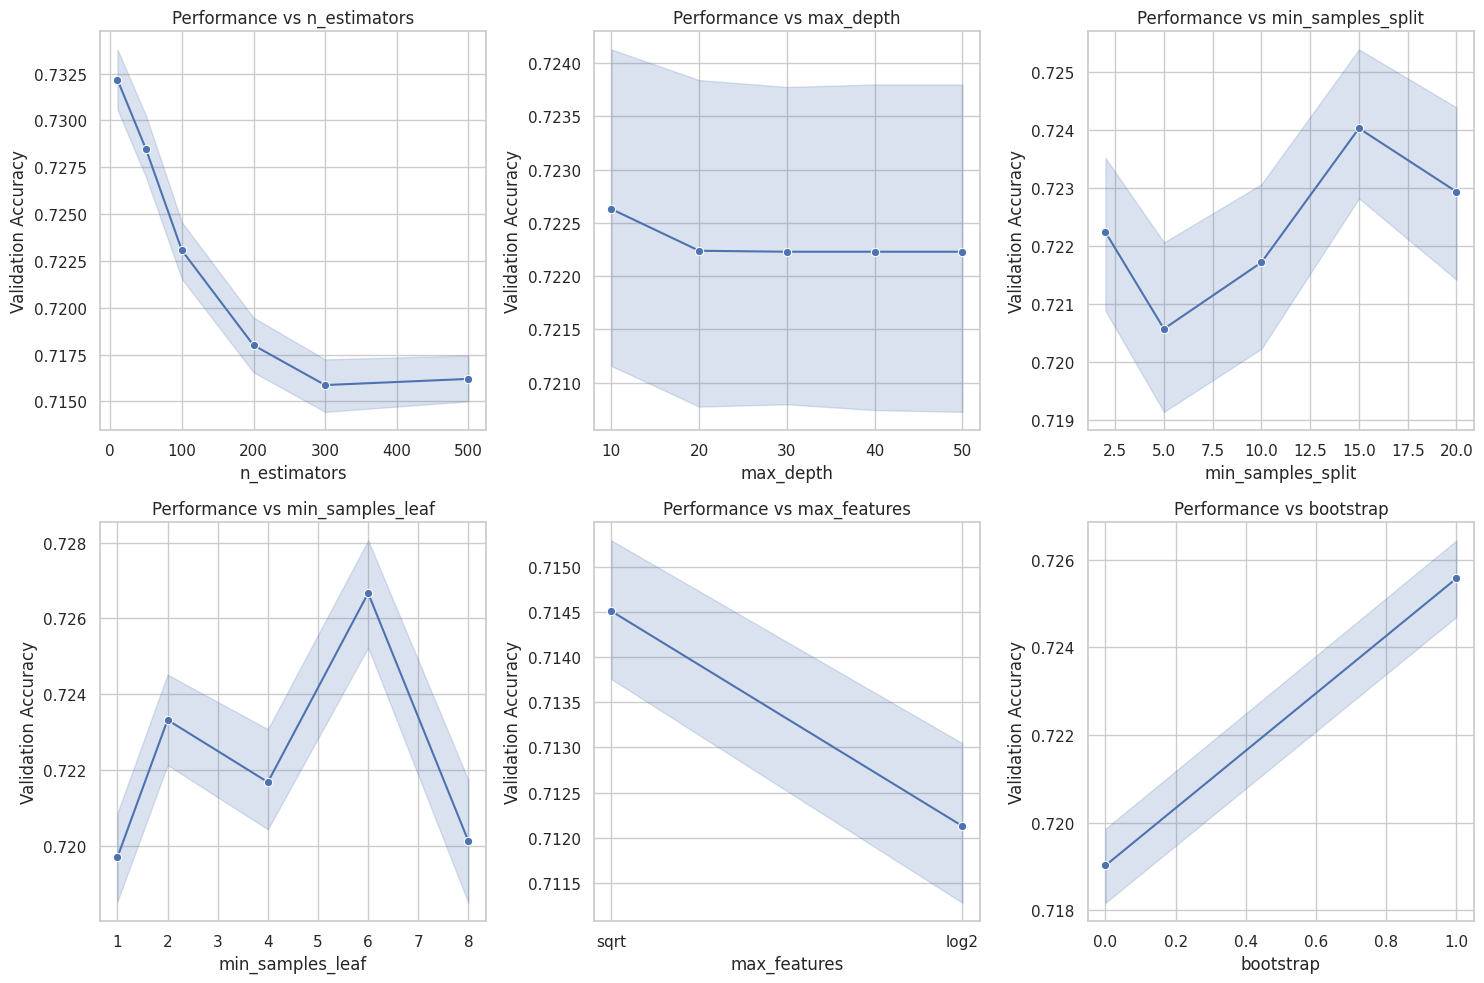

In [30]:
# Define a more extensive parameter grid for the Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for the best split
    'bootstrap': [True, False]
}

# Create all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))

results = []  # List to store results

# Manually perform grid search by iterating over parameter combinations
for params in param_combinations:
    # Map parameters to their respective hyperparameter names
    param_dict = dict(zip(param_grid.keys(), params))
    
    # Initialize the model with the current set of parameters
    clf = RandomForestClassifier(random_state=42, **param_dict)
    
    # Fit the model on the training data
    clf.fit(X, y)
    
    # Predict on the validation dataset
    y_pred_val = clf.predict(X_val)
    
    # Calculate accuracy on the validation set
    accuracy = accuracy_score(y_val, y_pred_val)
    
    # Append the result (parameters and accuracy) to the results list
    result = {**param_dict, 'accuracy': accuracy}
    results.append(result)

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Plotting the impact of each parameter on validation accuracy
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot for each hyperparameter
for i, param in enumerate(param_grid.keys()):
    plt.subplot(2, 3, i+1)  # Create a subplot for each parameter
    sns.lineplot(x=param, y='accuracy', data=results_df, marker='o')
    plt.title(f'Performance vs {param}')
    plt.ylabel('Validation Accuracy')
    plt.xlabel(param)

plt.tight_layout()
plt.show()

## Discussion

- Bootstrapping is better
- We should use `max_features` = `sqrt`
- We can use 6 for the minimum samples per leaf.
- Likewise, a minimum of 15 samples is best for splitting
- Surprisingly, `max_depth` and `n_estimators` are best lowest. We will need to tune these further to find an optimal

## Finer Tuning

Step 0/300 running...
Accuracy: 0.6916666666666667
Step 1/300 running...
Accuracy: 0.6916666666666667
Step 2/300 running...
Accuracy: 0.6916666666666667
Step 3/300 running...
Accuracy: 0.6916666666666667
Step 4/300 running...
Accuracy: 0.6916666666666667
Step 5/300 running...
Accuracy: 0.6916666666666667
Step 6/300 running...
Accuracy: 0.7395833333333334
Step 7/300 running...
Accuracy: 0.7395833333333334
Step 8/300 running...
Accuracy: 0.7395833333333334
Step 9/300 running...
Accuracy: 0.6479166666666667
Step 10/300 running...
Accuracy: 0.6479166666666667
Step 11/300 running...
Accuracy: 0.6479166666666667
Step 12/300 running...
Accuracy: 0.6104166666666667
Step 13/300 running...
Accuracy: 0.6104166666666667
Step 14/300 running...
Accuracy: 0.6104166666666667
Step 15/300 running...
Accuracy: 0.6895833333333333
Step 16/300 running...
Accuracy: 0.6875
Step 17/300 running...
Accuracy: 0.6854166666666667
Step 18/300 running...
Accuracy: 0.6770833333333334
Step 19/300 running...
Accuracy: 0

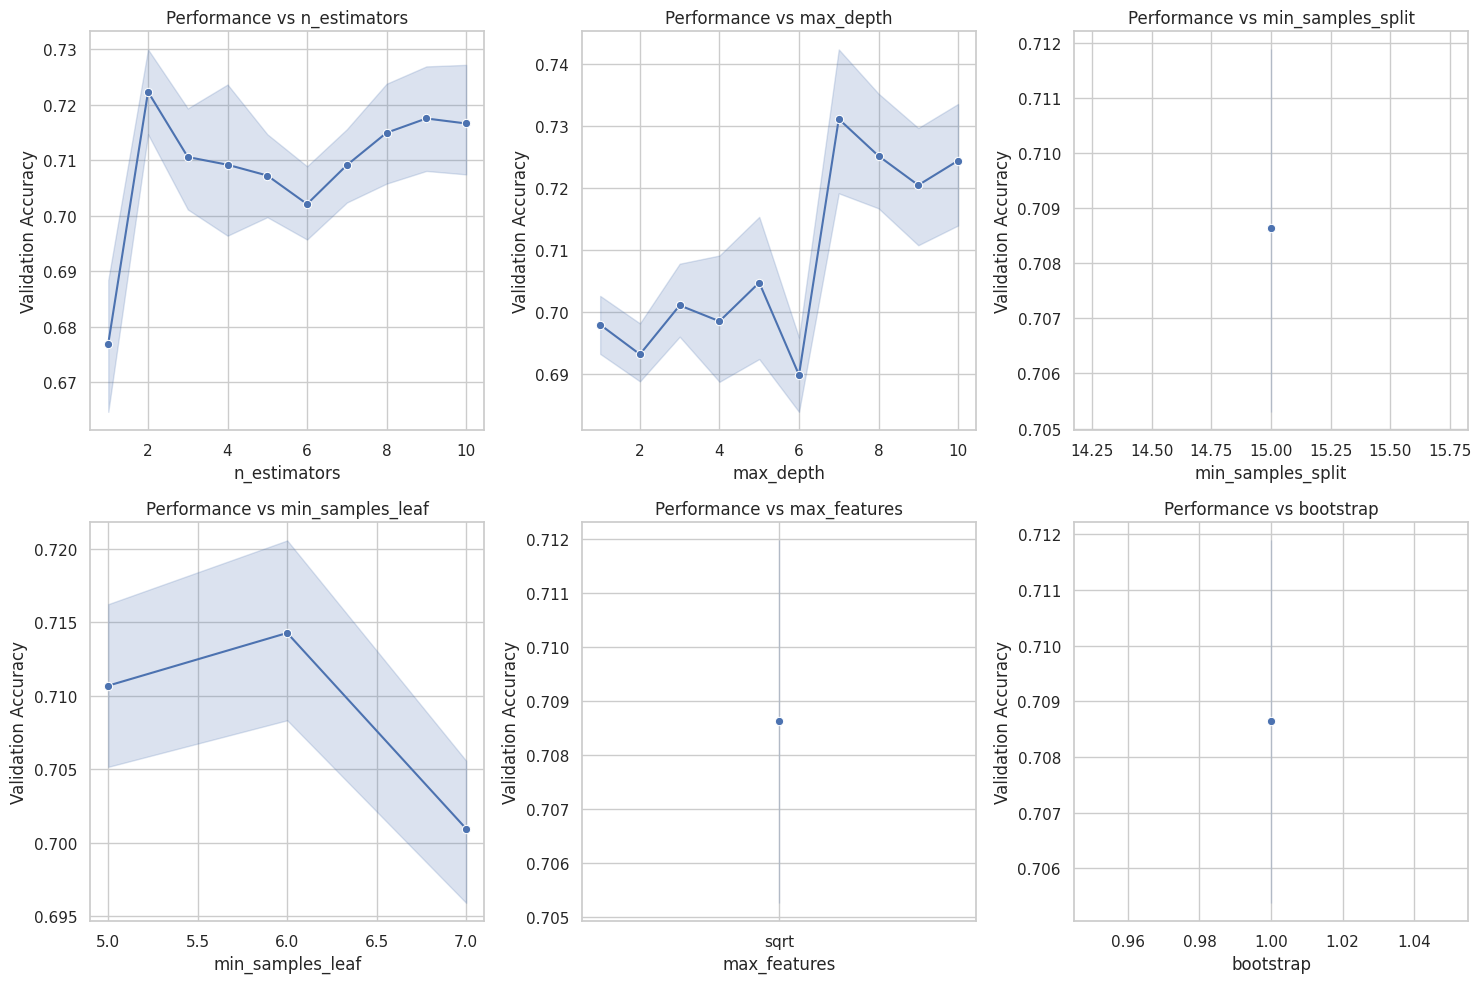

In [32]:
# Define a more extensive parameter grid for the Random Forest
param_grid = {
    'n_estimators': [i for i in range(1, 11)],  # Number of trees in the forest
    'max_depth': [i for i in range(1, 11)],  # Maximum depth of the tree
    'min_samples_split': [15],  # Minimum samples required to split an internal node
    'min_samples_leaf': [5, 6, 7],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt'],  # Number of features to consider for the best split
    'bootstrap': [True]
}
# Create all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))

results = []  # List to store results

# Manually perform grid search by iterating over parameter combinations
for i, params in enumerate(param_combinations):
    print(f'Step {i}/{len(param_combinations)} running...')

    # Map parameters to their respective hyperparameter names
    param_dict = dict(zip(param_grid.keys(), params))
    
    # Initialize the model with the current set of parameters
    clf = RandomForestClassifier(random_state=42, **param_dict)
    
    # Fit the model on the training data
    clf.fit(X, y)
    
    # Predict on the validation dataset
    y_pred_val = clf.predict(X_val)
    
    # Calculate accuracy on the validation set
    accuracy = accuracy_score(y_val, y_pred_val)
    print(f'Accuracy: {accuracy}')
    
    # Append the result (parameters and accuracy) to the results list
    result = {**param_dict, 'accuracy': accuracy}
    results.append(result)

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Plotting the impact of each parameter on validation accuracy
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot for each hyperparameter
for i, param in enumerate(param_grid.keys()):
    plt.subplot(2, 3, i+1)  # Create a subplot for each parameter
    sns.lineplot(x=param, y='accuracy', data=results_df, marker='o')
    plt.title(f'Performance vs {param}')
    plt.ylabel('Validation Accuracy')
    plt.xlabel(param)

plt.tight_layout()
plt.show()

# Narrow GridSearch with CV

In [35]:
# Define a more extensive parameter grid for the Random Forest
param_grid = {
    'n_estimators': [1, 2, 5, 9, 10, 11, 20],  # Number of trees in the forest
    'max_depth': [7],  # Maximum depth of the tree
    'min_samples_split': [15],  # Minimum samples required to split an internal node
    'min_samples_leaf': [6],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt'],  # Number of features to consider for the best split
    'bootstrap': [True]
}

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the GridSearchCV with the RandomForestClassifier and parameter grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Perform the grid search
grid_search.fit(X, y)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Save the best model to a file
model_filename = "best_random_forest_model.pkl"
joblib.dump(best_clf, model_filename)
print(f"Model saved as {model_filename}")

# Print the best parameters and the best score
print("Best parameters found by grid search:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Train the best classifier on the train dataset
best_clf.fit(X, y)

# Predict on the val dataset
y_pred = best_clf.predict(X_val)

# Evaluate the best classifier
print("Validation Classification Report:\n", classification_report(y_val, y_pred))

# Predict on the test dataset
y_pred = best_clf.predict(X_test)

# Evaluate the best classifier
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Model saved as best_random_forest_model.pkl
Best parameters found by grid search: {'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 10}
Best cross-validation accuracy: 0.8921568627450981
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       243
           1       0.72      0.80      0.76       237

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       366
           1       0.88      0.74      0.80       361

    accuracy                           0.82       727
   macro avg       0.83      0.82      0.82       727
weighted avg       0

# Summary

- The random forest is much better than the decison tree (89% vs 84%)
- The f1-score is slightly off (0.82 vs 0.84)
- The best parameters we found are `{'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 10}`